In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

import global_params as G
plt.rcParams['figure.figsize'] = G.SMALL_FIG

In [3]:
import numpy as np
from scipy.fftpack import fft, fftshift, ifft
from scipy import signal

np.set_printoptions(precision=4, suppress=True)

In [4]:
from wavegen import sine_wave, mysinc
from freq_domain import plotspec

## Section 7.2

<IPython.core.display.Javascript object>


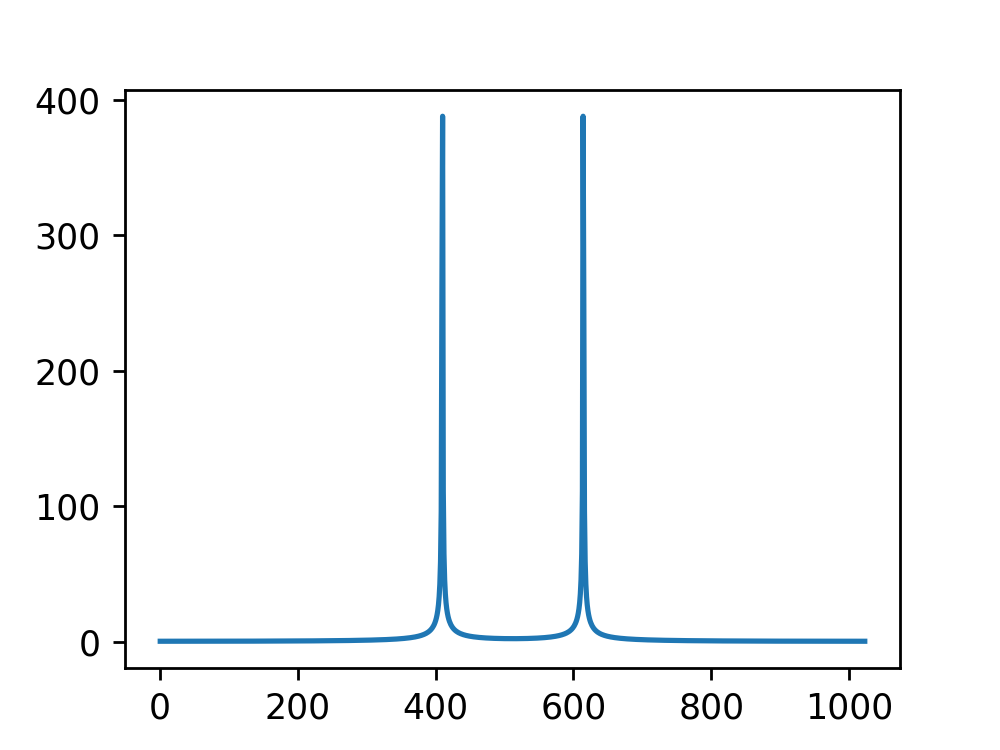

In [5]:
# L7.1
f = 600
Ts = 1/1000
duration = 5.0
t, w = sine_wave(f, duration, Ts)

N = 2**10
fw = abs(fft(w[:N]))
plt.plot(fw);

<IPython.core.display.Javascript object>


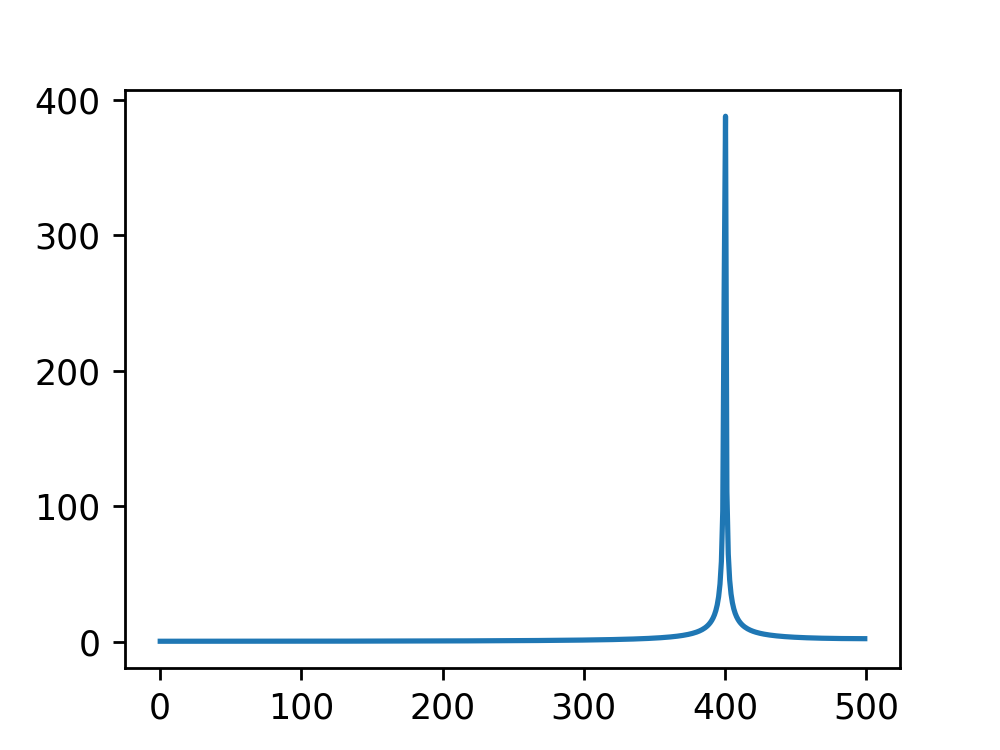

In [6]:
# L7.2
# Only plot positive freqs for a real signal
freqs = np.arange(N//2)/(N*Ts)
plt.plot(freqs, fw[:len(freqs)]);

<IPython.core.display.Javascript object>


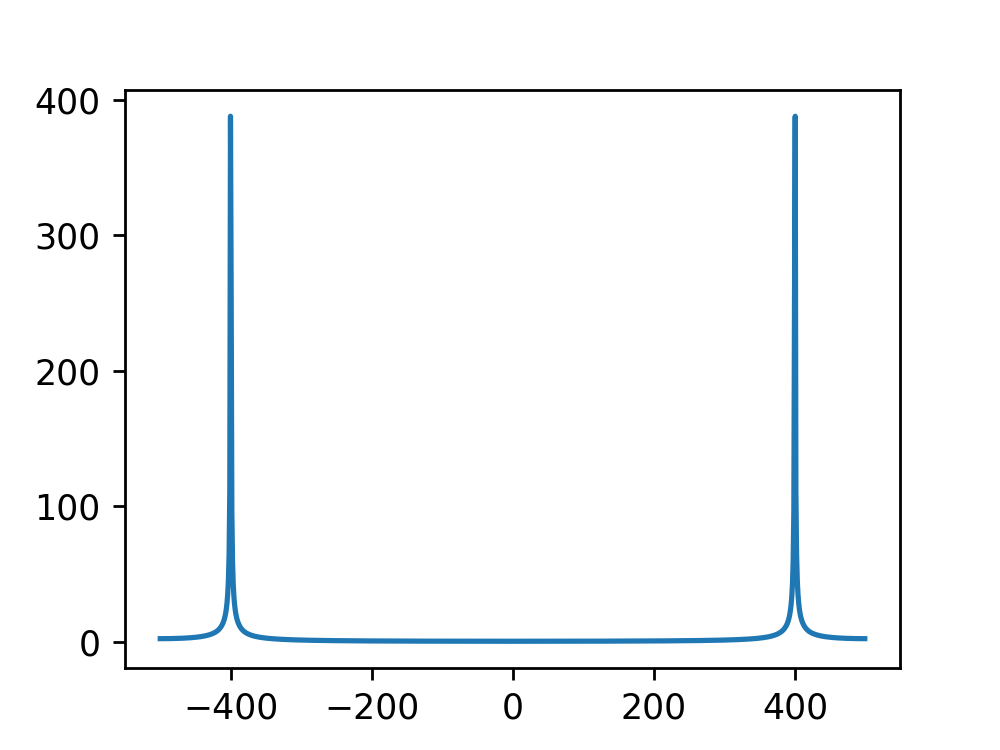

In [7]:
# L7.3 - Use fftshift
freqs = np.arange(-N//2, N//2)/(N*Ts)
plt.plot(freqs, abs(fftshift(fw)));

<IPython.core.display.Javascript object>


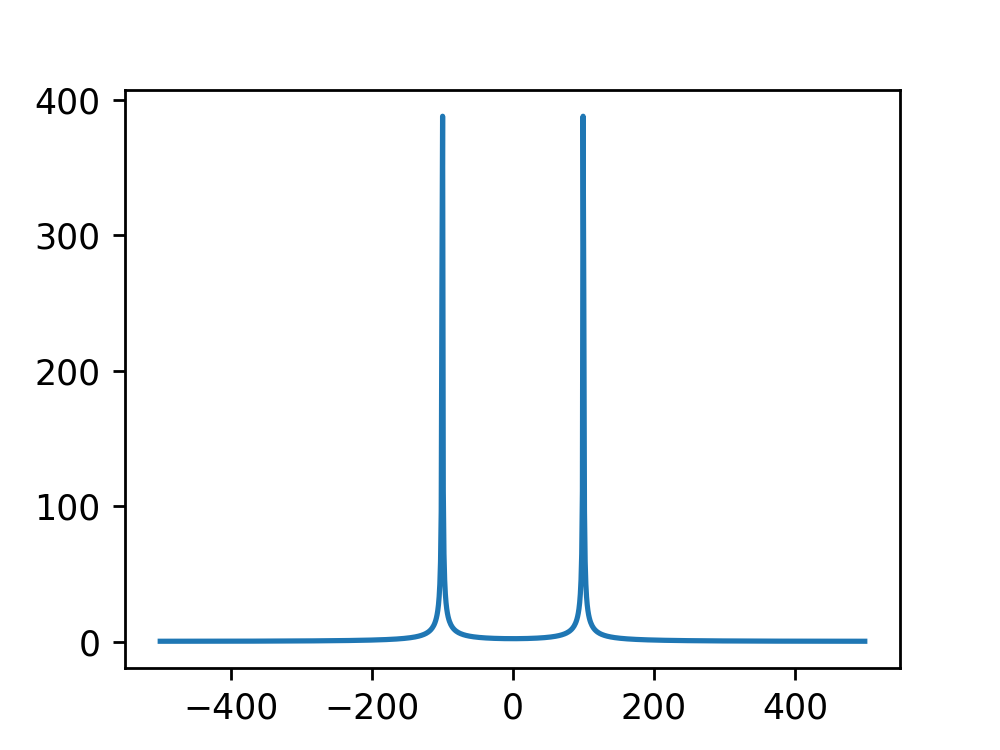

In [8]:
# Ex 7.5 - Play around with f/Ts/N
f = 100
Ts = 1/1000
duration = 5.0*1
t, w = sine_wave(f, duration, Ts)

N = 2**10
fw = abs(fft(w[:N]))

freqs = np.arange(-N//2, N//2)/(N*Ts)
plt.plot(freqs, abs(fftshift(fw)));

<IPython.core.display.Javascript object>


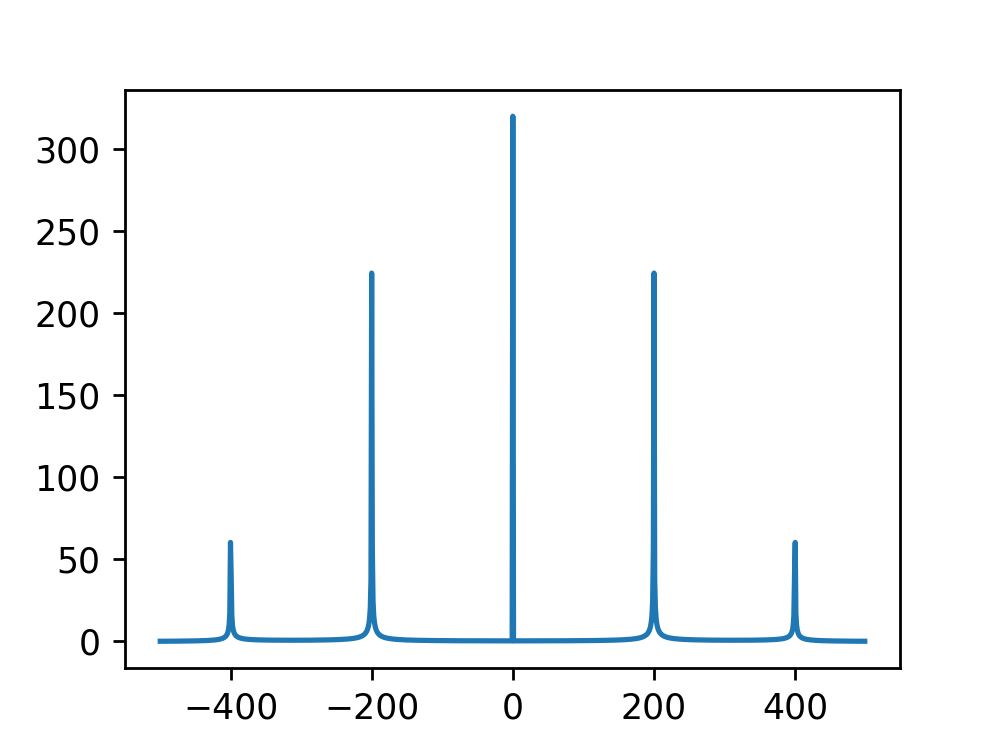

In [9]:
# Ex 7.6
f = 100
Ts = 1/1000
duration = 5.0*1
t, w = sine_wave(f, duration, Ts)

# Powers of sin
w = w**6

N = 2**10
fw = abs(fft(w[:N]))

freqs = np.arange(-N//2, N//2)/(N*Ts)
plt.plot(freqs, abs(fftshift(fw)));

<IPython.core.display.Javascript object>


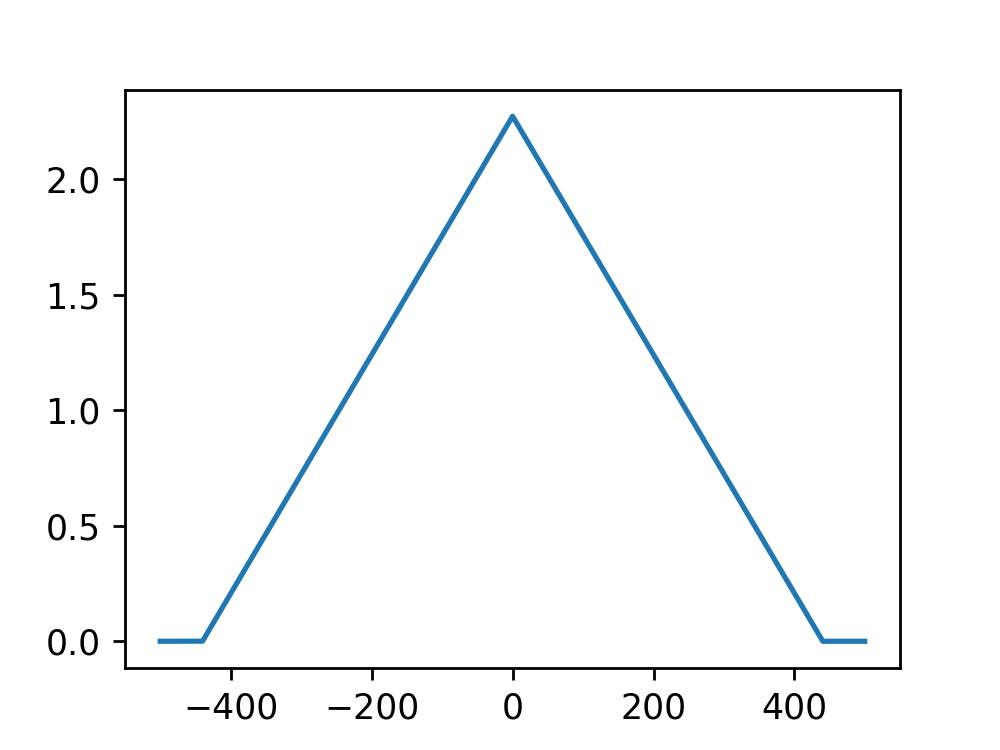

In [10]:
# Ex 7.7 - Sinc
f = 220
Ts = 1/1000
duration = 5.0*1
t, w = mysinc(f, duration, Ts)

w = w**2

N = 2**12 # Need N large enough to capture the whole sinc signal
fw = abs(fft(w[:N]))

freqs = np.arange(-N//2, N//2)/(N*Ts)
plt.plot(freqs, abs(fftshift(fw)));

<IPython.core.display.Javascript object>


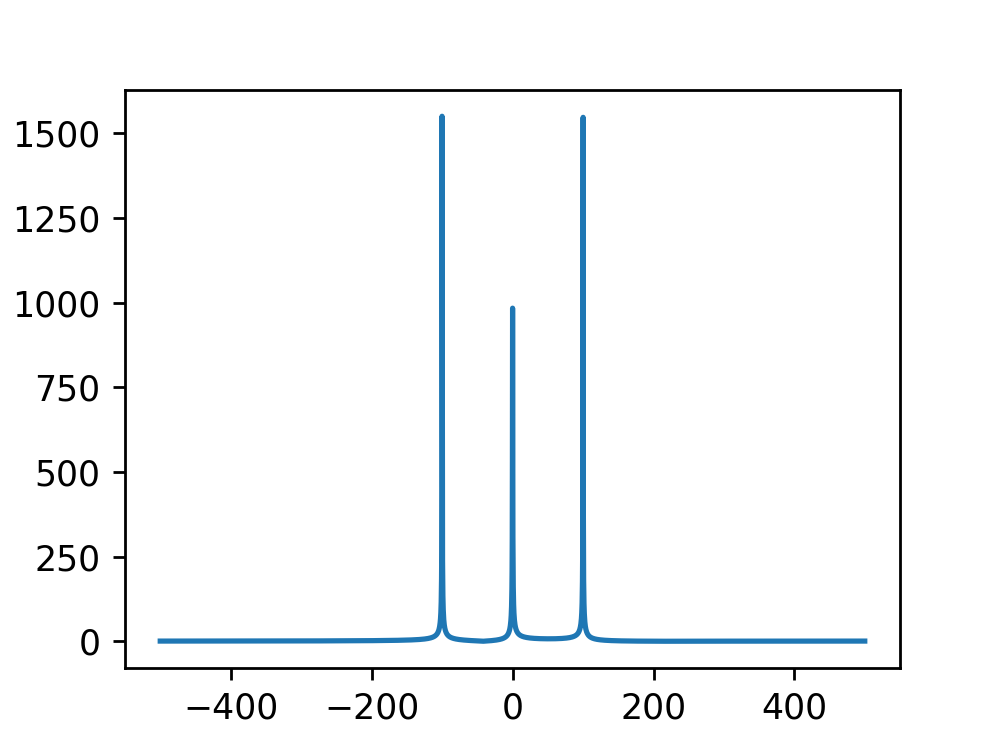

In [11]:
# Ex 7.8 - Complex signal
f = 100
Ts = 1/1000
duration = 5.0*1
t, w = sine_wave(f, duration, Ts)

w = w + 1j*np.exp(-t)

N = 2**12
fw = abs(fft(w[:N]))

freqs = np.arange(-N//2, N//2)/(N*Ts)
plt.plot(freqs, abs(fftshift(fw)));

Rate = 44100 samples/sec


/Users/kaniska/opt/anaconda3/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


<IPython.core.display.Javascript object>


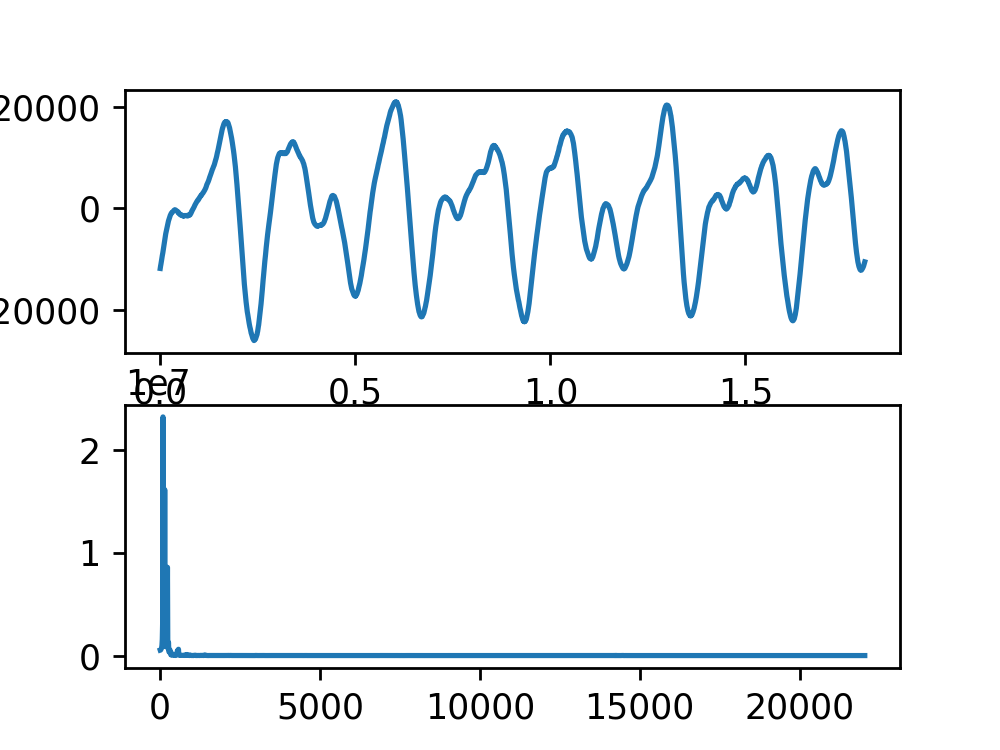

In [12]:
# Gong
from scipy.io import wavfile
filename = 'book_files/gong2.wav'
rate, orig_data = wavfile.read(filename)
print(f'Rate = {rate} samples/sec')
Ts = 1/rate
N = 2**12
data = orig_data[:N]
t = np.arange(len(data))/Ts

plt.subplot(211); plt.plot(t, data)

fw = abs(fft(data))
freqs = np.arange(N//2)/(Ts*N)
plt.subplot(212); plt.plot(freqs, fw[:len(freqs)]);

### 7.2.1 - FIR Implementation

In [13]:
h = np.array([1, -1, 2, -2, 3, -3], dtype=int)
x = np.array([1, 2, 3, 4, 5, 6, -5, -4, -3, -2, -1], dtype=int)
len(h), len(x)

(6, 11)

In [14]:
# Direct convolution
yconv = np.convolve(h, x)
len(yconv)

16

In [15]:
# Filtering
yfilt = signal.lfilter(h, 1., x)
len(yfilt)

11

In [16]:
yfilt == yconv[:len(yfilt)]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [17]:
# FFT
n = len(h) + len(x) - 1 # Pad length
h_pad = np.pad(h, [0, n-len(h)], constant_values=[0])
x_pad = np.pad(x, [0, n-len(x)], constant_values=[0])
h_fft = fft(h_pad)
x_fft = fft(x_pad)
y_fft = h_fft * x_fft
y_freq = ifft(y_fft).real
len(y_freq)

16

In [18]:
y_freq.round(0) == yconv

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [19]:
# Time domain filter (using a sliding window)
delays = np.zeros_like(h, dtype=int)
y_time = np.zeros_like(x)
for idx, sample in enumerate(x):
    delays = np.roll(delays, 1)
    delays[0] = sample
    y_time[idx] = np.dot(delays, h)

y_time == yfilt

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

<IPython.core.display.Javascript object>


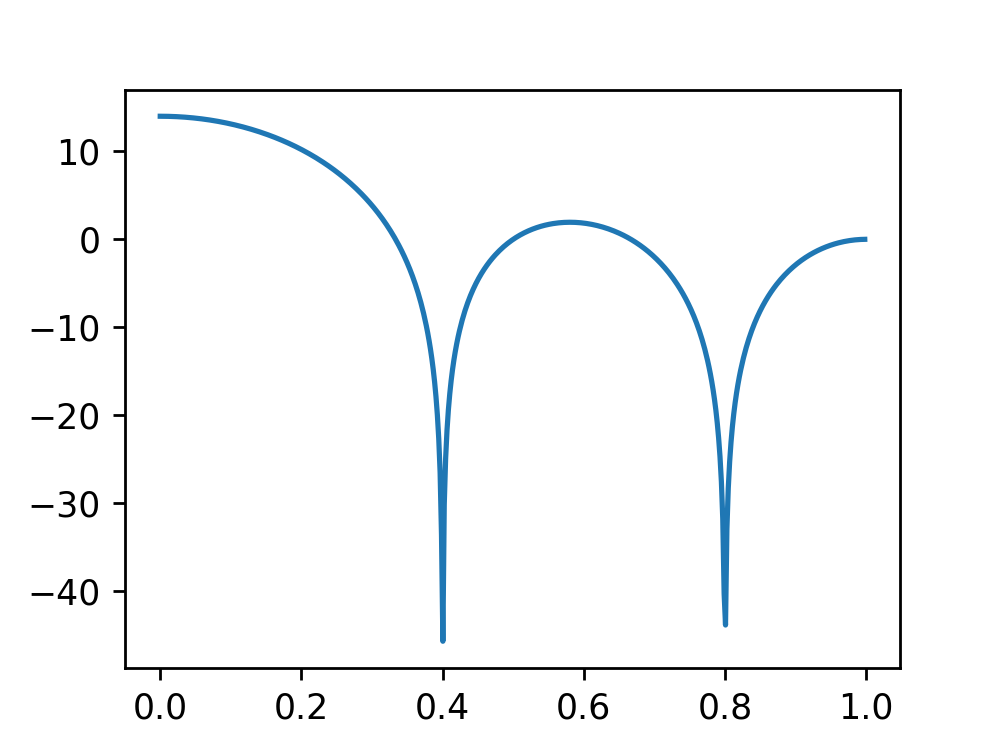

In [20]:
# Freq response using freqz
h = np.array([1,1,1,1,1])
w, freq_resp = signal.freqz(h)
plt.plot(w/np.pi, 20*np.log10(abs(freq_resp)));

### 7.2.2 IIR Filters

<IPython.core.display.Javascript object>


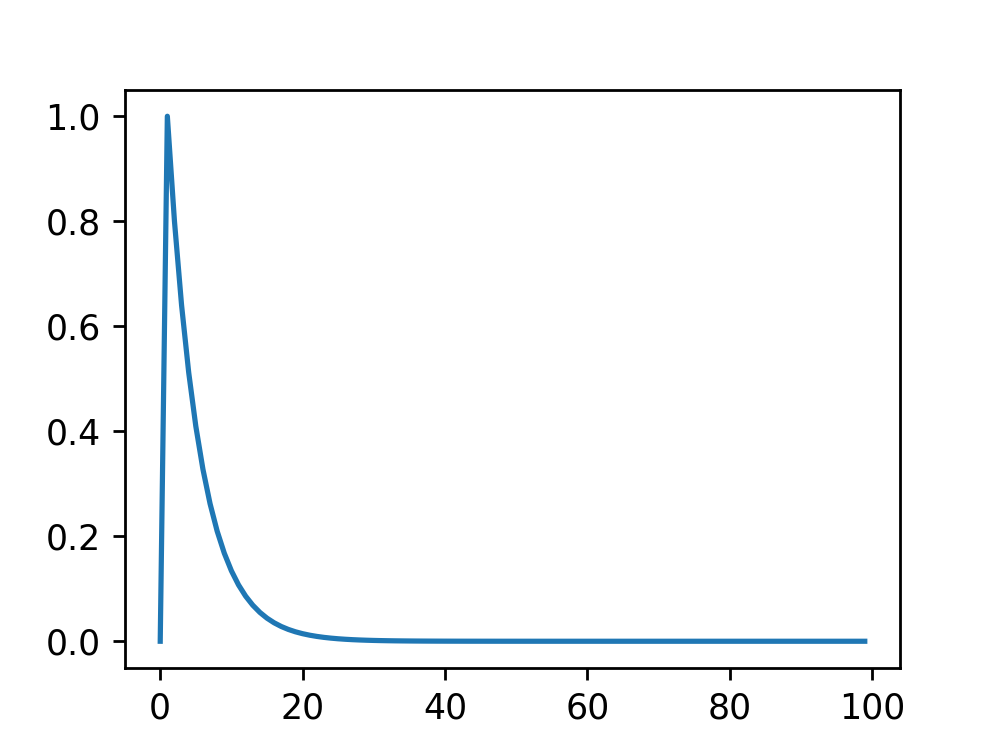

In [21]:
b = np.array([1])
a = np.array([1, -.8])

iir = signal.dlti(b,a)
t, h = signal.dimpulse(iir, n=100)
final_h = h[0].reshape(100,)
plt.plot(t, final_h);

In [22]:
d = np.random.randn(20,)
yfilt = signal.lfilter(final_h, 1., d)
yfilt2 = signal.lfilter(b, a, d)

In [23]:
yfilt2

array([ 1.9261,  3.2184,  2.5965,  3.9967,  2.942 ,  3.7863,  2.4835,
        0.8011,  0.5731,  0.3147,  0.8904, -0.7311, -2.4882, -1.224 ,
       -0.8108,  0.4994,  1.413 ,  3.0847,  3.0686,  1.7355])

In [24]:
yfilt

array([ 0.    ,  1.9261,  3.2184,  2.5965,  3.9967,  2.942 ,  3.7863,
        2.4835,  0.8011,  0.5731,  0.3147,  0.8904, -0.7311, -2.4882,
       -1.224 , -0.8108,  0.4994,  1.413 ,  3.0847,  3.0686])

In [25]:
# Implement a Direct form I realization
x = np.zeros_like(b, float)
y = np.zeros(len(a)-1, float)
stream = np.zeros_like(d, float)
for idx, sample in enumerate(d):
    x = np.roll(x, 1)
    x[0] = sample
    output = np.dot(b, x) + np.dot(-a[1:], y)
    stream[idx] = output
    y = np.roll(y, 1)
    y[0] = output
stream

array([ 1.9261,  3.2184,  2.5965,  3.9967,  2.942 ,  3.7863,  2.4835,
        0.8011,  0.5731,  0.3147,  0.8904, -0.7311, -2.4882, -1.224 ,
       -0.8108,  0.4994,  1.413 ,  3.0847,  3.0686,  1.7355])

In [26]:
stream == yfilt2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [20]:
plt.close('all')